# Python data analysis with Pandas (and Matplotlib): Solutions


This notebook is a self-study workshop for basic analysis of a dataset in Python. This will be done by exploring the functionalities of `pandas`, a fast, powerful, flexible and easy to use open source data analysis and manipulation tool. We will also use `matplotlib` to modify some of the plots generated by `pandas`.

For demonstrative purposes, we will use a modified version of the <a href="https://www.kaggle.com/somesnm/partynyc">"2016 Parties in New York"</a> dataset, which is derived from the <a href="https://opendata.cityofnewyork.us/">NYC Open Data portal</a>. 


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/West_side_of_Manhattan_from_Hudson_Commons_%2895103p%29.jpg/2560px-West_side_of_Manhattan_from_Hudson_Commons_%2895103p%29.jpg" alt="drawing" width="600"/>

## Contents
- [Introduction](#Introduction)
- [Part 1: Loading data in a Pandas DataFrame, selection and indexing](#part1)
- [Part 2: Tyding and manipulating the data set](#Part-2:-Tidying-and-manipulating-the-data-set)
    - [Missing data](#Missing-data)
    - [Modifying a column using the `.apply` method and `lambda` functions (Optional)](#Modifying-a-column-using-the-.apply-method-and-lambda-functions-(Optional))
- [Part 3: Visualising the data set](#Part-3:-Visualising-the-data-set)


## Introduction
This dataset contains the complaints calls that were received by the city police with complaint type "Loud music/Party" in 2016. The New York city hotline receives non-urgent community concerns, made public by the city through the NYC Open Data portal. The full database contains a variety of complaints including illegal parking and generic customer complaints. This subset only contains noise-related complaints that were collected in 2016 and indicate ongoing parties in a given neighborhood. 

The data contains the following columns:
- Call Id: the unique alphanumerical identifier of the complaint;
- Created Date: when was the complaint call recorded;
- Closed Date: when was the issue closed (solved);
- Location Type: type of the signaled location;
- Incident Zip: zip code of the location;	
- Neighborhood: same as Borough (see below), apart from Queens; 	
- Borough: administrative division of the city (Manhattan, Brooklyn, Bronx, Queens and Staten Island)	;
- Latitude: latitude of the location (with some approximation);
- Longitude: longitude of the location (with some approximation).

The packages used in this notebook are:
- Pandas (see [Documentation](https://pandas.pydata.org/docs/reference/index.html))
- Numpy (see [Documentation](https://numpy.org/doc/stable/reference/index.html#reference))
- Matplotlib (pyplot) (see [Documentation](https://matplotlib.org/2.0.2/contents.html))

Let's import these Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
<a id='part1'></a>
## Part 1: Loading data in a Pandas DataFrame, selection and indexing.

### Loading the data

We start by loading the data set. Pandas allows a variety of input data sources, including comma-separated values (CSV) files (e.g., `.csv` files), excel spreadhsheets, and relational databases. Here we gather the data from a `.csv` file hosted in a server, using a specific address (e.g., url). Alternatively, we could have first downloaded the data, and then loaded from our local hard disk.

Since we are fetching data from a server, running the cell below may take some time.

In [2]:
# dataset_url = 'https://surfdrive.surf.nl/files/index.php/s/DCtctCUajQky4Gb/download'
dataset_url = 'https://surfdrive.surf.nl/files/index.php/s/e5hDu2YuS8wcfMy/download'
df = pd.read_csv(dataset_url)

Now we use the `.head()` function of our newly created Pandas object to get a sneak peek of the data. This function displays the first five rows of the dataframe by default. We can specify how many rows to display by inputting the number of rows ourselves, that is the only argument of `.head()`.

In [3]:
df.head() # sneak peek

,Call Id,Created Date,Closed Date,Location Type,Incident Zip,Neighborhood,Borough,Latitude,Longitude
0,Jr6StvFVsqvHUaHU,2016-01-01 00:00:09,2016-01-01 01:57:32,Street/Sidewalk,11201.0,BROOKLYN,BROOKLYN,40.701823,-73.982840
1,xxuw16uOWNKpemGe,2016-01-01 00:00:40,2016-01-01 03:12:53,Residential Building/House,10468.0,BRONX,BRONX,40.875565,-73.886111
2,OepmuLReDy6uV9CI,2016-01-01 00:02:59,2016-01-01 23:35:50,Residential Building/House,0.0,NaN,Unspecified,NaN,NaN
3,LHpDLn0sQ0Z7SgwT,2016-01-01 00:03:03,2016-01-01 03:24:46,Residential Building/House,11373.0,ELMHURST,QUEENS,40.745728,-73.886210
4,KrlszCywvdXeSFi8,2016-01-01 00:03:29,2016-01-01 02:43:08,Residential Building/House,11236.0,BROOKLYN,BROOKLYN,40.636065,-73.896306


As you can see, the DataFrame object we just created (e.g., `df`) is a 2-dimensional data structure that can store data of different types in columns. It is similar to a spreadsheet or an SQL table, or the `data.frame` in R, in case you are familiar with the latter programming environment. 

### The DataFrame

A DataFrame always has a "vertical" index (i.e., the very first column in the table displayed above) and a "horizontal" one, the columns themselves. You can access them as follows:

In [4]:
df.index

RangeIndex(start=0, stop=224866, step=1)

In [5]:
df.columns

Index(['Call Id', 'Created Date', 'Closed Date', 'Location Type',
       'Incident Zip', 'Neighborhood', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')

The data in the table is instead stored in the `values` property of the DataFrame

In [6]:
df.values

array([['Jr6StvFVsqvHUaHU', '2016-01-01 00:00:09', '2016-01-01 01:57:32',
        ..., 'BROOKLYN', 40.70182309943841, -73.98284003196223],
       ['xxuw16uOWNKpemGe', '2016-01-01 00:00:40', '2016-01-01 03:12:53',
        ..., 'BRONX', 40.87556453341452, -73.8861112339118],
       ['OepmuLReDy6uV9CI', '2016-01-01 00:02:59', '2016-01-01 23:35:50',
        ..., 'Unspecified', nan, nan],
       ...,
       ['2kdxFvEj3DKK86Cg', '2016-12-31 23:56:20', '2017-01-01 13:34:00',
        ..., 'QUEENS', 40.74366173371021, -73.9230672615343],
       ['0f187cTr4AjELfTf', '2016-12-31 23:56:41', '2017-01-01 03:49:12',
        ..., 'MANHATTAN', 40.85844745053305, -73.92927888866892],
       ['O4yMxGq7QiWCcoun', '2016-12-31 23:58:52', '2017-01-01 00:59:52',
        ..., 'BRONX', 40.877449669903285, -73.9104984611231]],
      dtype=object)

Noticing something familiar? The values of the DataFrame look like a NumPy array! Indeed, Pandas is built on top of NumPy.

In [7]:
type(df.values)

numpy.ndarray

### Creating a DataFrame from scratch

Before we created a dataframe from an existing data source, which is extremely common. You can create DataFrames in many other ways, for instance from a numpy array and a list of columns:

In [8]:
random_data = np.random.rand(5,3)       # create a 5x3 table of random numbers
cols = ['column 1','column 2','column 3']
pd.DataFrame(data=random_data,columns=cols)

,column 1,column 2,column 3
0,0.037767,0.830271,0.741319
1,0.834707,0.206472,0.628723
2,0.444382,0.959150,0.410116
3,0.916877,0.456790,0.670313
4,0.002207,0.493817,0.804116


Of course, we should make sure the number of columns matches the dimensionality of the underlying data; otherwise we get an error. See it for yourself by uncommenting the line of code below and running the cell.

In [9]:
# pd.DataFrame(data=random_data,columns=['column 1','column 2'])

### Summarizing the DataFrame to gather information and reloading it properly

When loading an unkonown dataset into a pandas dataframe, it is important to check its concise summary with the `.info()` method. The method prints information such as its length (number of entries in the index), the name of the columns, their datatypes, the non-null values, and overall memory usage. A `null` value in a database usually identifies values which are unknown or missing.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224866 entries, 0 to 224865
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Call Id        224866 non-null  object 
 1   Created Date   224866 non-null  object 
 2   Closed Date    224073 non-null  object 
 3   Location Type  224866 non-null  object 
 4   Incident Zip   224866 non-null  float64
 5   Neighborhood   223879 non-null  object 
 6   Borough        224866 non-null  object 
 7   Latitude       223401 non-null  float64
 8   Longitude      223401 non-null  float64
dtypes: float64(3), object(6)
memory usage: 15.4+ MB


From these previous explorations, we see that the dataset has a column with the unique caller ID ("Call Id") and two columns that contain dates and times ("Created Date" and "Closed Date"). 

It makes sense to employ "Call Id" as the index of our DataFrame. Similarly, we would like to parse the datetime columns into `datetime` format, rather than the generic `object` format (e.g., a string of characters) we are currently using (see the output of `.info` in the cell above). Lastly, the "Incident Zip" column should be loaded as an integer field rather than a float.


Let's reload the dataset by using the "Call Id" as the index, parsing datetime columns, and specify the correct datatype for the zip code.

In [11]:
# reload dataset
# df = pd.read_csv('https://surfdrive.surf.nl/files/index.php/s/DCtctCUajQky4Gb/download', index_col=0, 
#                 parse_dates=['Created Date','Closed Date'],
#                 dtype={'Incident Zip': np.int16})

df = pd.read_csv('https://surfdrive.surf.nl/files/index.php/s/e5hDu2YuS8wcfMy/download', index_col=0, 
                 parse_dates=['Created Date','Closed Date'],
                 dtype={'Incident Zip': np.int16})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224866 entries, Jr6StvFVsqvHUaHU to O4yMxGq7QiWCcoun
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Created Date   224866 non-null  datetime64[ns]
 1   Closed Date    224073 non-null  datetime64[ns]
 2   Location Type  224866 non-null  object        
 3   Incident Zip   224866 non-null  int16         
 4   Neighborhood   223879 non-null  object        
 5   Borough        224866 non-null  object        
 6   Latitude       223401 non-null  float64       
 7   Longitude      223401 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int16(1), object(3)
memory usage: 14.2+ MB


You can see the change in the information above. We now have another Index instead of the original (0-based) RangeIndex and different data types (Dtype) for the "Created Date","Closed Date", and "Incident Zip" columns.

Now that we loaded our data in a more suitable way, we can start analysing it. For instance, we can check the number of unique values in the categorical columns: ['Location Type','Incident Zip','Neighborhood','Borough']

In [12]:
categorical_columns = ['Location Type','Incident Zip','Neighborhood','Borough'] 
for col in categorical_columns:
    print(f'{col} has {df[col].nunique()} unique values')

Location Type has 6 unique values
Incident Zip has 195 unique values
Neighborhood has 48 unique values
Borough has 6 unique values


On the other hand, a summary of the statistics of a continuous variable in the data set can be obtained using the `.describe()` function.

In [13]:
df[['Longitude', 'Latitude']].describe()

,Longitude,Latitude
count,223401.000000,223401.000000
mean,-73.924879,40.749719
std,0.063778,0.082058
min,-74.251277,40.498820
25%,-73.958244,40.684648
50%,-73.929704,40.739153
75%,-73.893279,40.829257
max,-73.702303,40.912178


---

### Selecting data entries (rows):

While we changed our index to better reflect the nature of the dataset, we can always select an entry in the DataFrame via its underlying 0-based index. This because, as we mentioned before, the Pandas DataFrame stores the data in a NumPy ndarray. We do this by using the `.iloc` method; the command below selects the first entry (e.g., row) of the dataset.

In [14]:
df.iloc[0]

Created Date     2016-01-01 00:00:09
Closed Date      2016-01-01 01:57:32
Location Type        Street/Sidewalk
Incident Zip                   11201
Neighborhood                BROOKLYN
Borough                     BROOKLYN
Latitude                   40.701823
Longitude                  -73.98284
Name: Jr6StvFVsqvHUaHU, dtype: object

The last complaint in the data set can be selected instead using: 

In [15]:
df.iloc[-1]

Created Date            2016-12-31 23:58:52
Closed Date             2017-01-01 00:59:52
Location Type    Residential Building/House
Incident Zip                          10463
Neighborhood                          BRONX
Borough                               BRONX
Latitude                           40.87745
Longitude                        -73.910498
Name: O4yMxGq7QiWCcoun, dtype: object

> As you can see, whenever we select an entry, Python returns an interesting data structure with multiple fields known as a **Series**. A pandas Series is a one-dimensional labelled data structure which can hold data such as strings, integers and even other Python objects. Like the DataFrame, it is built on top of numpy array and is the primary data structure to hold one-dimensional data in pandas.

In [16]:
type(df.iloc[-1])

pandas.core.series.Series

To select multiple entries, you can provide a range of indexes or a list of indexes similar to the numpy syntax:

In [17]:
df.iloc[0:4]

,Created Date,Closed Date,Location Type,Incident Zip,Neighborhood,Borough,Latitude,Longitude
Call Id,,,,,,,,
Jr6StvFVsqvHUaHU,2016-01-01 00:00:09,2016-01-01 01:57:32,Street/Sidewalk,11201,BROOKLYN,BROOKLYN,40.701823,-73.982840
xxuw16uOWNKpemGe,2016-01-01 00:00:40,2016-01-01 03:12:53,Residential Building/House,10468,BRONX,BRONX,40.875565,-73.886111
OepmuLReDy6uV9CI,2016-01-01 00:02:59,2016-01-01 23:35:50,Residential Building/House,0,NaN,Unspecified,NaN,NaN
LHpDLn0sQ0Z7SgwT,2016-01-01 00:03:03,2016-01-01 03:24:46,Residential Building/House,11373,ELMHURST,QUEENS,40.745728,-73.886210


In [18]:
df.iloc[[0,1,2,3]]

,Created Date,Closed Date,Location Type,Incident Zip,Neighborhood,Borough,Latitude,Longitude
Call Id,,,,,,,,
Jr6StvFVsqvHUaHU,2016-01-01 00:00:09,2016-01-01 01:57:32,Street/Sidewalk,11201,BROOKLYN,BROOKLYN,40.701823,-73.982840
xxuw16uOWNKpemGe,2016-01-01 00:00:40,2016-01-01 03:12:53,Residential Building/House,10468,BRONX,BRONX,40.875565,-73.886111
OepmuLReDy6uV9CI,2016-01-01 00:02:59,2016-01-01 23:35:50,Residential Building/House,0,NaN,Unspecified,NaN,NaN
LHpDLn0sQ0Z7SgwT,2016-01-01 00:03:03,2016-01-01 03:24:46,Residential Building/House,11373,ELMHURST,QUEENS,40.745728,-73.886210


Whenever we select more than one row, Python returns a DataFrame, rather than a Series.

In [19]:
type(df.iloc[[0,1,2,3]])

pandas.core.frame.DataFrame

So far you selected items using the `.iloc` method, following the 0-based integer approach of NumPy. There is a different method called `loc` which operates in a *label-based* fashion. This which means that you have to specify rows based on their labels, these are the elements in the `index` column ("Call Id", in our case). 

In [20]:
df.loc[['Jr6StvFVsqvHUaHU','xxuw16uOWNKpemGe']]

,Created Date,Closed Date,Location Type,Incident Zip,Neighborhood,Borough,Latitude,Longitude
Call Id,,,,,,,,
Jr6StvFVsqvHUaHU,2016-01-01 00:00:09,2016-01-01 01:57:32,Street/Sidewalk,11201,BROOKLYN,BROOKLYN,40.701823,-73.982840
xxuw16uOWNKpemGe,2016-01-01 00:00:40,2016-01-01 03:12:53,Residential Building/House,10468,BRONX,BRONX,40.875565,-73.886111


We will discuss other differences between these two indexing approaches later in this notebook. 

---

### Selecting Columns

We can select a column (usually corresponding to a single variable in the data set) by providing the column name with the following syntax:

In [21]:
df['Location Type']

Call Id
Jr6StvFVsqvHUaHU               Street/Sidewalk
xxuw16uOWNKpemGe    Residential Building/House
OepmuLReDy6uV9CI    Residential Building/House
LHpDLn0sQ0Z7SgwT    Residential Building/House
KrlszCywvdXeSFi8    Residential Building/House
                               ...            
CiRkWGEyIUDoV02X              Store/Commercial
KWWqnRtaId0mbFQZ    Residential Building/House
2kdxFvEj3DKK86Cg    Residential Building/House
0f187cTr4AjELfTf    Residential Building/House
O4yMxGq7QiWCcoun    Residential Building/House
Name: Location Type, Length: 224866, dtype: object

As you may have expected, Python returns a one-dimensional Series when selecting a single column

In [22]:
type(df['Location Type'])

pandas.core.series.Series

Multiple columns can be selected by providing a list of column names:

In [23]:
df[['Location Type', 'Neighborhood']]

,Location Type,Neighborhood
Call Id,,
Jr6StvFVsqvHUaHU,Street/Sidewalk,BROOKLYN
xxuw16uOWNKpemGe,Residential Building/House,BRONX
OepmuLReDy6uV9CI,Residential Building/House,NaN
LHpDLn0sQ0Z7SgwT,Residential Building/House,ELMHURST
KrlszCywvdXeSFi8,Residential Building/House,BROOKLYN
...,...,...
CiRkWGEyIUDoV02X,Store/Commercial,NEW YORK
KWWqnRtaId0mbFQZ,Residential Building/House,NEW YORK
2kdxFvEj3DKK86Cg,Residential Building/House,SUNNYSIDE


Alternatively, you can select values in one or multiple columns using the `.iloc` method like illustrated in the cell below. We use also the `.tail` method to only show the last 5 entries of the selection (the "opposite" of `head`). Notice the difference in the indexing used with respect to the row indexing we saw before.

In [24]:
df.iloc[:,1:3].tail()

,Closed Date,Location Type
Call Id,,
CiRkWGEyIUDoV02X,2017-01-01 00:01:41,Store/Commercial
KWWqnRtaId0mbFQZ,2017-01-01 02:05:06,Residential Building/House
2kdxFvEj3DKK86Cg,2017-01-01 13:34:00,Residential Building/House
0f187cTr4AjELfTf,2017-01-01 03:49:12,Residential Building/House
O4yMxGq7QiWCcoun,2017-01-01 00:59:52,Residential Building/House


---
### Selecting a subset of the data with rows and columns

We can select a subset our data by specifying both rows and columns. We can do this in many ways, common ones include:

In [25]:
# Select the Created Date, Closed Date and Location Type of the first four data entries using .iloc
df.iloc[0:4,0:3]

,Created Date,Closed Date,Location Type
Call Id,,,
Jr6StvFVsqvHUaHU,2016-01-01 00:00:09,2016-01-01 01:57:32,Street/Sidewalk
xxuw16uOWNKpemGe,2016-01-01 00:00:40,2016-01-01 03:12:53,Residential Building/House
OepmuLReDy6uV9CI,2016-01-01 00:02:59,2016-01-01 23:35:50,Residential Building/House
LHpDLn0sQ0Z7SgwT,2016-01-01 00:03:03,2016-01-01 03:24:46,Residential Building/House


In [26]:
# Select the latitude and longitude the first data entry using loc
df.loc['Jr6StvFVsqvHUaHU',['Latitude','Longitude']]

Latitude     40.701823
Longitude    -73.98284
Name: Jr6StvFVsqvHUaHU, dtype: object

In [27]:
# Select the latitude and longitude of the first data entry using iloc for row indexing, and column names
df.iloc[0][['Latitude','Longitude']]

Latitude     40.701823
Longitude    -73.98284
Name: Jr6StvFVsqvHUaHU, dtype: object

---
### <font color='red'>Exercise</font>

Print the following values:
- The neighborhood of the second complaint in the data set
- The longitude and latitude of the last two complaints in the data set
- The location type of the second, fourth and fifth complaints

In [28]:
# neighborhood of the second complaint in the data set
print(df.iloc[1]['Neighborhood'])

BRONX


In [29]:
# longitude and latitude of the last two complaints in the data set
print(df.iloc[-2:][['Longitude', 'Latitude']])

                  Longitude   Latitude
Call Id                               
0f187cTr4AjELfTf -73.929279  40.858447
O4yMxGq7QiWCcoun -73.910498  40.877450


In [30]:
# location type of the second, fourth and fifth complaints
print(df.iloc[[1, 3, 4]]['Location Type'])

Call Id
xxuw16uOWNKpemGe    Residential Building/House
LHpDLn0sQ0Z7SgwT    Residential Building/House
KrlszCywvdXeSFi8    Residential Building/House
Name: Location Type, dtype: object


---
## Part 2: Tidying and manipulating the data set

Now that we know how to select entries and columns in the data set, it is time to make sure the data set is [tidy](https://www.jeannicholashould.com/tidy-data-in-python.html). In our case, this means getting rid of incomplete observations, and replacing any missing variables.

### Missing data

Most datasets come with missing (*null* or NaN, i.e. Not-a-Number) data points, for various reasons. It is important to address these missing values by either removing rows/columns containing them, or finding a suitable way to substitute them.

#### Finding missing values

The `.isnull()` method is used to identify missing values for array-like objects in pandas. The `.isnull()` method returns a dataframe where every item in the original dataframe is replaced with either `True`, if the value is missing, or `False` when it is not missing.

In [31]:
df.isnull().head()

,Created Date,Closed Date,Location Type,Incident Zip,Neighborhood,Borough,Latitude,Longitude
Call Id,,,,,,,,
Jr6StvFVsqvHUaHU,False,False,False,False,False,False,False,False
xxuw16uOWNKpemGe,False,False,False,False,False,False,False,False
OepmuLReDy6uV9CI,False,False,False,False,True,False,True,True
LHpDLn0sQ0Z7SgwT,False,False,False,False,False,False,False,False
KrlszCywvdXeSFi8,False,False,False,False,False,False,False,False


We want to compute how many *null* values there are in each column. This can be done with the `.sum()` method, which sums all the values in a column (where `True` is equal to one and `False` is equal to zero). Therefore, chaining `isnull()` with `.sum()`, returns the summary of missing values. Note that the returned value is a a pandas Series object. 

In [32]:
df.isnull().sum()

Created Date        0
Closed Date       793
Location Type       0
Incident Zip        0
Neighborhood      987
Borough             0
Latitude         1465
Longitude        1465
dtype: int64

There are some missing values for 4 columns/variables. A reasonable approach to deal with the missing values in this dataset is to proceeed like this:

1. Remove all records for which we don't have a 'Neighborhood' entry.
1. Replace the missing 'Closed Date' values by the 'Created Date' plus the average time period between 'Closed Date' and 'Created Date' as computed from all the other calls.
1. Fill missing 'Latitude' and 'Longitude' datapoints with the average coordinates computed from all other calls within the same 'Neighborhood'.

*1. Remove missing 'Neighborhood' entries*

The `.dropna()` method can be used to "drop" all rows for which the 'Neighborhood' field is missing. We use the `inplace=True` argument for brevity. This assigns the result to the original dataframe, so that you don't have to write `df = df.dropna(subset=['Neighborhood'])`. Note that there are some restrictions on using `inplace=True`, as discussed [here](https://stackoverflow.com/questions/43893457/understanding-inplace-true) for instance. 

In [33]:
df.dropna(subset=['Neighborhood'], inplace=True)
print(df.isnull().sum())

Created Date       0
Closed Date       75
Location Type      0
Incident Zip       0
Neighborhood       0
Borough            0
Latitude         488
Longitude        488
dtype: int64


It can be seen that the data entries removed due to the missing neighborhood often missed "Latitude", "Longitude" and "Closed Date" information as well.

*2. Replace the missing 'Closed Date' values*

Our next task is to substitute missing values for 'Closed Date' by adding an average 'Duration' to the `Created Date` entry. We proceed like this:
1. Add a 'Duration' column to the DataFrame by subtracting 'Closed Date' and 'Created Date'. We can do this operation since both columns are of `datetime` type. This will return a `timedelta`column (see [here](pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Timedelta.html) for more information on the `timedelta` datatype). A NaN value is automatically entered for rows that don't have a 'Closed Date' value. 
2. Replace the NaN values in the columnt 'Duration' with the mean value of the 'Duration' column using the `.fillna` method.
3. Identify the rows with a missing 'Closed Date', and substitute them with 'Created Date' + 'Duration'. 

In [34]:
df['Duration'] = df['Closed Date'] - df['Created Date']      # compute duration (timedelta field)
df['Duration'].fillna(df['Duration'].mean(), inplace=True)   # substitute average duration to missing duration
ixes_nan_time = df['Closed Date'].isnull()                   # find missing 
df.loc[ixes_nan_time, 'Closed Date'] = df.loc[ixes_nan_time, 'Created Date'] + \
                                       df.loc[ixes_nan_time, 'Duration'] # substitute

print(df.isnull().sum())

Created Date       0
Closed Date        0
Location Type      0
Incident Zip       0
Neighborhood       0
Borough            0
Latitude         488
Longitude        488
Duration           0
dtype: int64


In the previous cell, we updated the values of the table using `.loc` for indexing and a `boolean` index (ixes_nan_time). 

You **cannot** use `.iloc` to assign new values to elements of the DataFrame. See the example below:

In [35]:
print(df.iloc[0]['Closed Date'])   # print original value 
df.iloc[0]['Closed Date'] = 0      # try to change it using .iloc 
print(df.iloc[0]['Closed Date'])   # verify if the change occurred

2016-01-01 01:57:32
2016-01-01 01:57:32


/var/folders/z_/f1syd05n42n0q756tshgn68h0000gn/T/ipykernel_37221/749659250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[0]['Closed Date'] = 0      # try to change it using .iloc


The change did not occurr, and Python also raises a *warning* to signal that.

*3. Fill missing 'Latitude' and 'Longitude' values*

This is a more involved task that requires computing the mean coordinate points for each 'Neighborhood' and fill the gaps in the DataFrame accordingly. There are many ways on how this can be done using Python and Pandas. Some are more optimized than others, meaning that they are faster to run but usually require more in-depth knowledge.

The method proposed below cycles through all the neighborhoods in a for loop, computes the mean coordinates for each of them, and fills the gaps. Remember that substituting values in a Pandas dataframe requires the use of `.loc`. We employ boolean indexing to perform our selections. 

First, let's select some entries with missing coordinates. We will use them to check if our code performed as expected.

In [36]:
# select control entries
control_call_ids = ['uWYAqPBcfz308cxT','GEtAE8xsKd7MjZyO','zde2L2EB1RpRR274']
df.loc[control_call_ids]

,Created Date,Closed Date,Location Type,Incident Zip,Neighborhood,Borough,Latitude,Longitude,Duration
Call Id,,,,,,,,,
uWYAqPBcfz308cxT,2016-05-12 20:55:46,2016-05-12 23:09:07,Residential Building/House,11377,WOODSIDE,QUEENS,NaN,NaN,0 days 02:13:21
GEtAE8xsKd7MjZyO,2016-09-04 02:13:06,2016-09-04 03:24:53,Residential Building/House,11216,BROOKLYN,BROOKLYN,NaN,NaN,0 days 01:11:47
zde2L2EB1RpRR274,2016-10-30 04:00:57,2016-10-30 11:11:26,Residential Building/House,10040,NEW YORK,MANHATTAN,NaN,NaN,0 days 07:10:29


Next, we extract all unique neighborhood names in the dataset, after sorting them in alphabetical order.

In [37]:
neighborhoods = df.Neighborhood.sort_values().unique()

> Note how it easy to chain multiple commands in a single line of code with Pandas.

We can now perform our substitutions by cycling through neighborhoods. To increase the readability of the output, we use *f-strings*, fixing the length of each neighborhoods to 20 characters, and limiting the mean coordinates to the sixth decimal point.

In [38]:
for neighborhood in neighborhoods:   
    selection = (df.Neighborhood==neighborhood)         # select all entries belonging to neighborhood
    mean_lat = df[selection]['Latitude'].mean()         # compute average coordinates
    mean_lon = df[selection]['Longitude'].mean()
    
    selection = ((df.Neighborhood==neighborhood)        # select all entries belonging to neighborhood... 
                 & (df.Latitude.isnull()))              # ...with missing latitude
    df.loc[selection,'Latitude'] = mean_lat
    
    selection = ((df.Neighborhood==neighborhood)        # select all entries belonging to neighborhood... 
                 & (df.Longitude.isnull()))              # ...with missing longitude
    df.loc[selection,'Longitude'] = mean_lon
    
    print(f'{neighborhood:20s}: mean Lat = {mean_lat:.6f}, mean Lon = {mean_lon:.6f}')      # echo on screen for control


ARVERNE             : mean Lat = 40.592687, mean Lon = -73.790945
ASTORIA             : mean Lat = 40.766229, mean Lon = -73.921583
BAYSIDE             : mean Lat = 40.769483, mean Lon = -73.775496
BELLEROSE           : mean Lat = 40.730825, mean Lon = -73.724469
BREEZY POINT        : mean Lat = 40.563975, mean Lon = -73.912628
BRONX               : mean Lat = 40.848122, mean Lon = -73.890301
BROOKLYN            : mean Lat = 40.671084, mean Lon = -73.947569
CAMBRIA HEIGHTS     : mean Lat = 40.695442, mean Lon = -73.737588
CENTRAL PARK        : mean Lat = 40.776203, mean Lon = -73.967590
COLLEGE POINT       : mean Lat = 40.786616, mean Lon = -73.844991
CORONA              : mean Lat = 40.748957, mean Lon = -73.860426
EAST ELMHURST       : mean Lat = 40.761341, mean Lon = -73.875426
ELMHURST            : mean Lat = 40.742537, mean Lon = -73.877068
FAR ROCKAWAY        : mean Lat = 40.598191, mean Lon = -73.771272
FLORAL PARK         : mean Lat = 40.733025, mean Lon = -73.708349
FLUSHING  

Let's see if we perform the right substitutions, by checking the overall number of *null* values in the DataFrame and comparing the values inserted in the control entries with the printout above.

In [39]:
print(df.isnull().sum())

Created Date     0
Closed Date      0
Location Type    0
Incident Zip     0
Neighborhood     0
Borough          0
Latitude         0
Longitude        0
Duration         0
dtype: int64


In [40]:
# select control entries
control_call_ids = ['uWYAqPBcfz308cxT','GEtAE8xsKd7MjZyO','zde2L2EB1RpRR274']
df.loc[control_call_ids]

,Created Date,Closed Date,Location Type,Incident Zip,Neighborhood,Borough,Latitude,Longitude,Duration
Call Id,,,,,,,,,
uWYAqPBcfz308cxT,2016-05-12 20:55:46,2016-05-12 23:09:07,Residential Building/House,11377,WOODSIDE,QUEENS,40.746600,-73.907178,0 days 02:13:21
GEtAE8xsKd7MjZyO,2016-09-04 02:13:06,2016-09-04 03:24:53,Residential Building/House,11216,BROOKLYN,BROOKLYN,40.671084,-73.947569,0 days 01:11:47
zde2L2EB1RpRR274,2016-10-30 04:00:57,2016-10-30 11:11:26,Residential Building/House,10040,NEW YORK,MANHATTAN,40.794172,-73.958868,0 days 07:10:29


---
### <font color='red'>Exercise</font>

The following lines create a copy of the original cleaned dataset, and substitute the "Location Type" of 10 entries with `null` values. These entries are randomly selected with the [`.sample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)  method.

In [41]:
df_exercise = df.copy()
corrupted_entries = df_exercise.sample(n=10, random_state=42).index
df_exercise.loc[corrupted_entries,"Location Type"] = np.nan
print(df_exercise.isnull().sum())

Created Date      0
Closed Date       0
Location Type    10
Incident Zip      0
Neighborhood      0
Borough           0
Latitude          0
Longitude         0
Duration          0
dtype: int64


Your task is to change all these values back by using the *most common* (e.g., the mode) "Location Type" of the dataset. You can retrieve this value using the `.mode()` or `.value_counts()` methods of the Series object. The latter method returns a Series containing counts of unique values in descending order, so that the first element is the most frequently-occurring element.

*Can you solve this problem using a single line of code?*

In [42]:
df_exercise.fillna(df_exercise["Location Type"].mode()[0], inplace=True)

TypeError: value should be a 'Timedelta', 'NaT', or array of those. Got 'str' instead.

In [43]:
print(df_exercise.isnull().sum())

Created Date     0
Closed Date      0
Location Type    0
Incident Zip     0
Neighborhood     0
Borough          0
Latitude         0
Longitude        0
Duration         0
dtype: int64


---
### Removing unnecessary columns

While manipulating your dataset or performing data analysis, you may need to remove or *drop* columns in the Pandas dataframe. You can drop column in using the `.drop` method.


In [44]:
df.head()

,Created Date,Closed Date,Location Type,Incident Zip,Neighborhood,Borough,Latitude,Longitude,Duration
Call Id,,,,,,,,,
Jr6StvFVsqvHUaHU,2016-01-01 00:00:09,2016-01-01 01:57:32,Street/Sidewalk,11201,BROOKLYN,BROOKLYN,40.701823,-73.982840,0 days 01:57:23
xxuw16uOWNKpemGe,2016-01-01 00:00:40,2016-01-01 03:12:53,Residential Building/House,10468,BRONX,BRONX,40.875565,-73.886111,0 days 03:12:13
LHpDLn0sQ0Z7SgwT,2016-01-01 00:03:03,2016-01-01 03:24:46,Residential Building/House,11373,ELMHURST,QUEENS,40.745728,-73.886210,0 days 03:21:43
KrlszCywvdXeSFi8,2016-01-01 00:03:29,2016-01-01 02:43:08,Residential Building/House,11236,BROOKLYN,BROOKLYN,40.636065,-73.896306,0 days 02:39:39
aXvwjFXypZkwBkHt,2016-01-01 00:04:06,2016-01-01 00:28:32,Street/Sidewalk,10026,NEW YORK,MANHATTAN,40.805201,-73.953147,0 days 00:24:26


Since the 'Neighborhood' and 'Borough' columns of the DataFrame are essentially the same (see the [Introduction](#Introduction)), we decide to drop the latter. We do so by specifying the name of the column, `axis=1` to indicate we are looking at a column, and `inplace=True` to update the dataframe.   

In [45]:
df.drop('Borough',axis=1, inplace=True)

In [46]:
df.head()

,Created Date,Closed Date,Location Type,Incident Zip,Neighborhood,Latitude,Longitude,Duration
Call Id,,,,,,,,
Jr6StvFVsqvHUaHU,2016-01-01 00:00:09,2016-01-01 01:57:32,Street/Sidewalk,11201,BROOKLYN,40.701823,-73.982840,0 days 01:57:23
xxuw16uOWNKpemGe,2016-01-01 00:00:40,2016-01-01 03:12:53,Residential Building/House,10468,BRONX,40.875565,-73.886111,0 days 03:12:13
LHpDLn0sQ0Z7SgwT,2016-01-01 00:03:03,2016-01-01 03:24:46,Residential Building/House,11373,ELMHURST,40.745728,-73.886210,0 days 03:21:43
KrlszCywvdXeSFi8,2016-01-01 00:03:29,2016-01-01 02:43:08,Residential Building/House,11236,BROOKLYN,40.636065,-73.896306,0 days 02:39:39
aXvwjFXypZkwBkHt,2016-01-01 00:04:06,2016-01-01 00:28:32,Street/Sidewalk,10026,NEW YORK,40.805201,-73.953147,0 days 00:24:26


---
### Modifying a column using the `.apply` method and `lambda` functions (Optional)

You can use `.apply` to *send* a single column to a function. This is useful when cleaning up data, converting formats, altering values etc. In the following lines, we modify the somewhate criptic 'Duration' column, which contains values in `timedelta64` format to minutes.

In [47]:
df.dtypes

Created Date      datetime64[ns]
Closed Date       datetime64[ns]
Location Type             object
Incident Zip               int16
Neighborhood              object
Latitude                 float64
Longitude                float64
Duration         timedelta64[ns]
dtype: object

In [48]:
def days_hours_minutes(td):
    return np.ceil(td.total_seconds()/60).astype(int)

df['Duration'].apply(days_hours_minutes)

Call Id
Jr6StvFVsqvHUaHU    118
xxuw16uOWNKpemGe    193
LHpDLn0sQ0Z7SgwT    202
KrlszCywvdXeSFi8    160
aXvwjFXypZkwBkHt     25
                   ... 
CiRkWGEyIUDoV02X      8
KWWqnRtaId0mbFQZ    131
2kdxFvEj3DKK86Cg    818
0f187cTr4AjELfTf    233
O4yMxGq7QiWCcoun     61
Name: Duration, Length: 223879, dtype: int64

When the function to apply is simple, you can usually resort to Python [*lambda*](https://www.w3schools.com/python/python_lambda.asp) functions. A lambda function is a small anonymous function, expressed with this syntax `lambda arguments : expression`.

In [49]:
df['Duration'].apply(lambda td: np.ceil(td.total_seconds()/60).astype(int))

Call Id
Jr6StvFVsqvHUaHU    118
xxuw16uOWNKpemGe    193
LHpDLn0sQ0Z7SgwT    202
KrlszCywvdXeSFi8    160
aXvwjFXypZkwBkHt     25
                   ... 
CiRkWGEyIUDoV02X      8
KWWqnRtaId0mbFQZ    131
2kdxFvEj3DKK86Cg    818
0f187cTr4AjELfTf    233
O4yMxGq7QiWCcoun     61
Name: Duration, Length: 223879, dtype: int64

---
## Part 3: Visualising the data set

After tyding up the dataset, let's visualise it with `pandas`. Depending on the type of data and the scope of our analysis, we can use different options. First, let's adjust the "Duration" columns as shown in the Optional section above (you don't need to go through it, if you don't want; just run the cell below!) 

In [50]:
df['Duration'] = df['Duration'].apply(lambda td: np.ceil(td.total_seconds()/60).astype(int))

### Boxplot

For instance, `boxplots` are very useful to gather basic information on the distribution of a particular continuous variable. They provide a visual summary of the data enabling the quick identification of average values, dispersion of the data set, and signs of skewness.

Let's visualize the boxplot of the recently modified 'Duration' column. Since `pandas` plotting functionalities are based on `matplotlib`, we can use the latter to "prettify" the figures. For instance we can add the *y* axis label to specify the unit (e.g., minutes).  

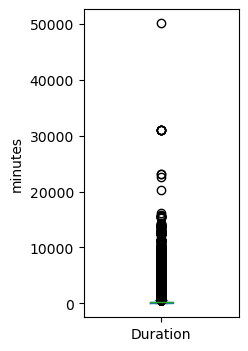

In [51]:
df['Duration'].plot(kind='box', figsize=(2,4));
plt.ylabel('minutes');

The data has many outliers, visualized as empty circles above. Let's remove them from the graph by specifying `showfliers=False`.

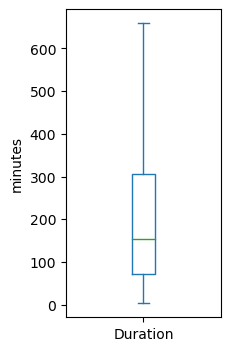

In [52]:
df['Duration'].plot(kind='box', showfliers=False, figsize=(2,4));
plt.ylabel('minutes');

---
### Histograms

We can also make a histogram of the `Incident Zip` column using the `DataFrame.hist()` function

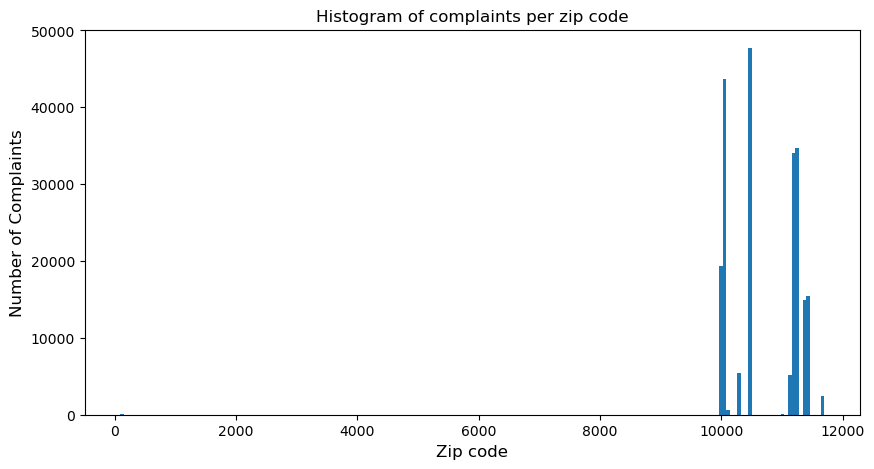

In [53]:
n_zip_codes=df['Incident Zip'].nunique()
df['Incident Zip'].plot(kind='hist', bins=n_zip_codes, figsize = (10,5));
plt.ylabel('Number of Complaints', fontsize=12);
plt.xlabel('Zip code', fontsize=12);
plt.title('Histogram of complaints per zip code');

It is difficult to read the histogram above since some zip codes are largely more present than others. We can use `matplotlib` functionalities to show the histogram using a logarithmic scale.

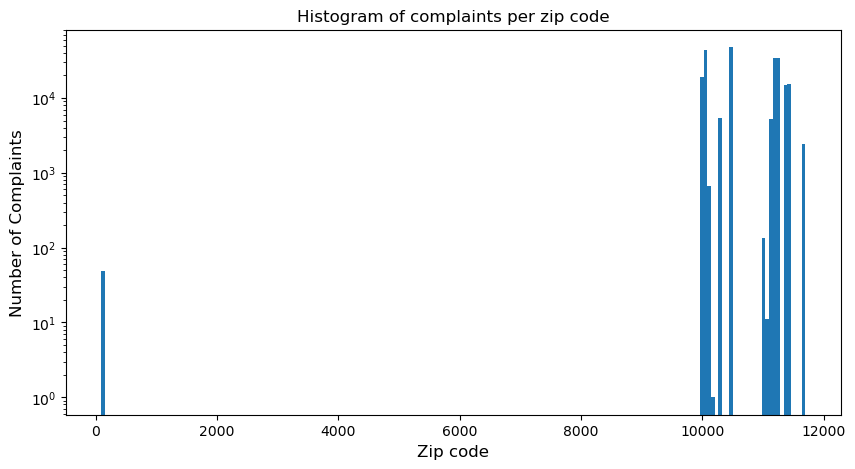

In [54]:
n_zip_codes=df['Incident Zip'].nunique()
df['Incident Zip'].plot(kind='hist', bins=n_zip_codes, figsize = (10,5));
plt.ylabel('Number of Complaints', fontsize=12);
plt.xlabel('Zip code', fontsize=12);
plt.title('Histogram of complaints per zip code');
plt.yscale('log')

We now notice there is an "anomalous" Zip code, outside of the range (e.g., [10000,12000]) of typical NYC neighborhoods. Further analysis reveal that the "anomalous" Zip code is actually that of "Central Park".

In [55]:
df.loc[df['Incident Zip']==df['Incident Zip'].min()].head()

,Created Date,Closed Date,Location Type,Incident Zip,Neighborhood,Latitude,Longitude,Duration
Call Id,,,,,,,,
Bd371LOQCMqaag0T,2016-02-21 12:15:37,2016-02-21 14:28:01,Street/Sidewalk,83,CENTRAL PARK,40.779185,-73.963532,133
nCEH1Lsl291OP6Mj,2016-02-28 12:47:15,2016-02-28 23:39:58,Street/Sidewalk,83,CENTRAL PARK,40.771568,-73.971897,653
mFvJ48pfTSkWMn2c,2016-02-28 12:57:33,2016-02-28 23:39:57,Street/Sidewalk,83,CENTRAL PARK,40.779185,-73.963532,643
9il4M71OFK8zzAww,2016-02-28 15:47:31,2016-02-28 23:39:55,Street/Sidewalk,83,CENTRAL PARK,40.779185,-73.963532,473
qnfvaK68b1Gproun,2016-03-06 14:54:49,2016-03-06 20:57:54,Street/Sidewalk,83,CENTRAL PARK,40.771568,-73.971897,364


---
### Barchart

Barcharts are very useful to represent categorical data with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. Below we use `pandas` barcharts, in combination with `.value_counts()` and `matplotlib` functions to 1) summarise the absolute and relative number of complaints divided by 'Location Type' and 2) save the results locally. Please check if the image has been created locally!

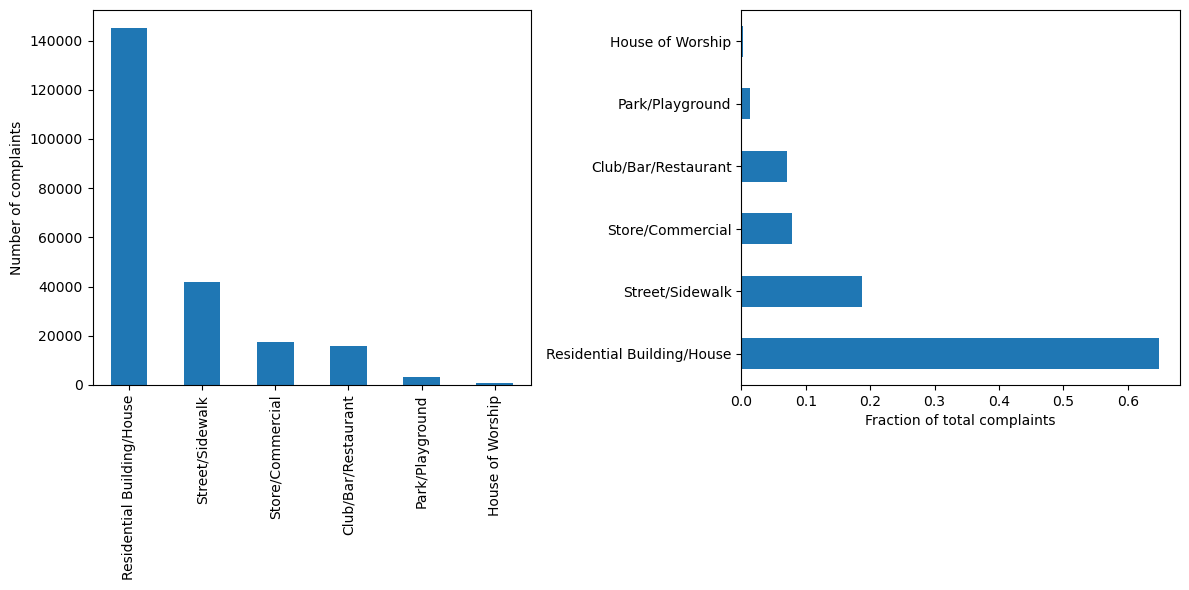

In [56]:
f, axes = plt.subplots(1,2,figsize=(12,6))

df['Location Type'].value_counts().plot(kind='bar', ax=axes[0]);
axes[0].set_ylabel('Number of complaints')

df['Location Type'].value_counts(normalize=True).plot(kind='barh', ax=axes[1]);
axes[1].set_xlabel('Fraction of total complaints')


f.tight_layout()
f.savefig('barcharts.png')

---
### <font color='red'>Exercise</font>

Given what you have seen so far, draw a *piechart* of the distribution of complaints for 'Location Type'. Use a figure size of (8,8) for clarity.

<AxesSubplot:ylabel='Location Type'>

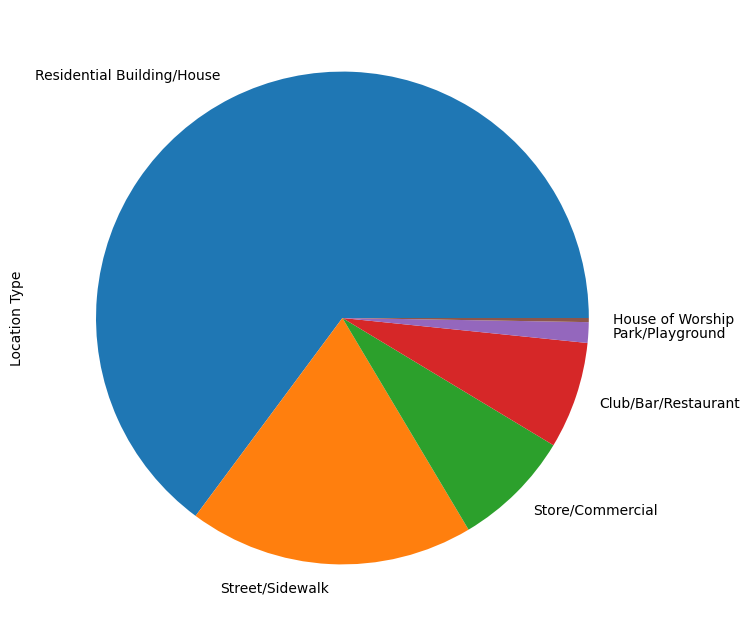

In [57]:
df['Location Type'].value_counts().plot(kind='pie', figsize=(8,8))

---

### Scatterplots

To create a scatterplot in pandas, one can use the `DataFrame.plot.scatter()` function (See [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html?highlight=scatter#pandas.DataFrame.plot.scatter)). 

We can use the scatterplot function to outline the map of New York City by creating a dot for each entry, somewhat mapping the spatial distribution of complaints.

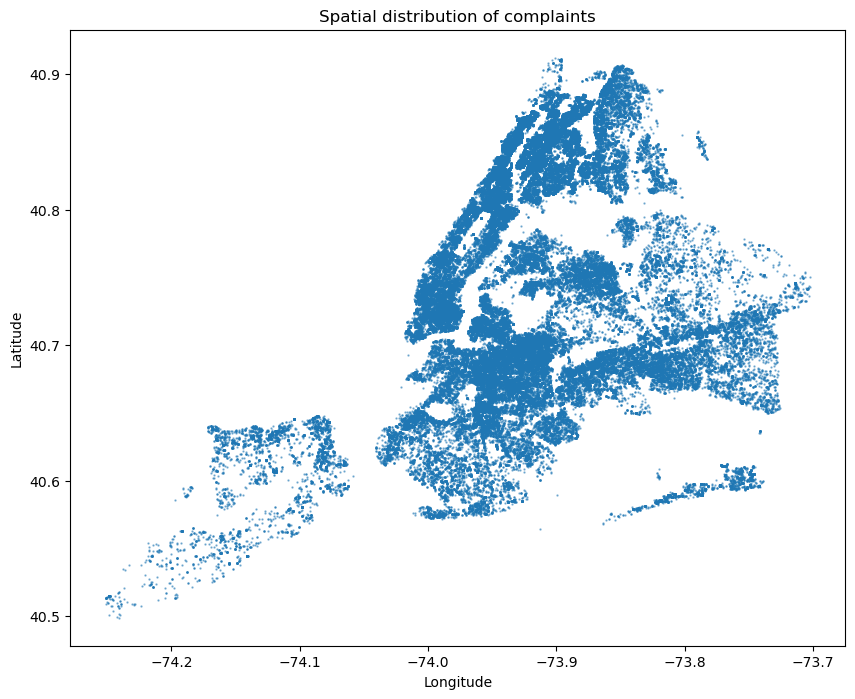

In [58]:
# Try changing and adding new parameters in the function to create a better visualization
df.plot.scatter('Longitude', 'Latitude', s = 0.5, alpha = 0.5, figsize=(10, 8));
plt.title('Spatial distribution of complaints');

---
### <font color='red'>Exercise</font>

As a final exercise, use scatterplot to create another map like the one above where:

- There is a dot of a different color for each 'Location Type'
- There is a legend showing which color belongs to which 'Location Type'
- Use colors and dot sizes which facilitate readability (e.g., diverse colors, sufficient size, ...)

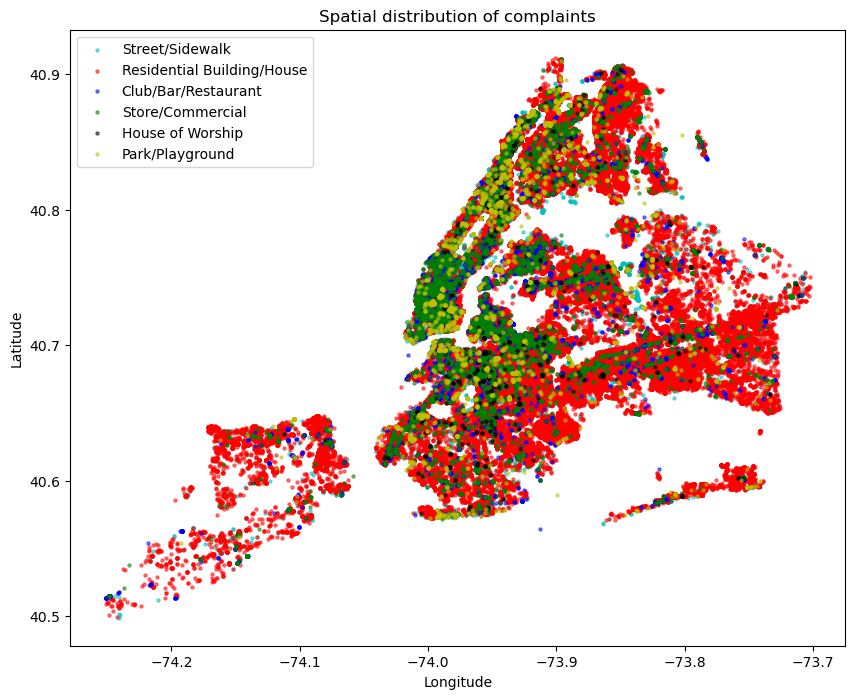

In [59]:
# locations and associated colors
location_types = df['Location Type'].unique()
colors = ['c','r','b','g','k','y']

f, ax = plt.subplots(1, figsize=(10,8))
for location_type,color in zip(location_types,colors):
    df[df['Location Type']==location_type].plot.scatter('Longitude', 'Latitude', 
                                                      s = 5, alpha = 0.5, c=color, ax = ax);
ax.set_title('Spatial distribution of complaints');
ax.legend(location_types);
